In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("data_files/Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("data_files/Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]

jordan_reg_data['GS'] = pd.to_numeric(jordan_reg_data['GS'], errors='coerce').fillna(0).astype(int)

lebron_stats_dict = {}
jordan_stats_dict = {}
# Find out total Seasons played

lebron_stats_dict['Seasons played'] = len(lebron_reg_data)
jordan_stats_dict['Seasons played'] = len(jordan_reg_data[jordan_reg_data['GS'] != 0])

# Find out total game played
lebron_reg_data['GS'] = lebron_reg_data['GS'].astype(int)
lebron_stats_dict['Games played'] = lebron_reg_data['GS'].sum()

jordan_stats_dict['Games played'] = jordan_reg_data['GS'].sum()

# Find out Total stats
lebron_reg_data.iloc[:, 5:-1] = lebron_reg_data.iloc[:, 5:-1].apply(pd.to_numeric, errors='coerce')
lebron_reg_data
jordan_reg_data.iloc[:, 5:-1] = jordan_reg_data.iloc[:, 5:-1].apply(pd.to_numeric, errors='coerce')
jordan_reg_data

lebron_stats_dict['Total Points'] = (lebron_reg_data['G'] * lebron_reg_data['PTS']).sum().round(0)
lebron_stats_dict['Total Assists'] = (lebron_reg_data['G'] * lebron_reg_data['AST']).sum().round(0)
lebron_stats_dict['Total Rebounds'] = (lebron_reg_data['G'] * lebron_reg_data['TRB']).sum().round(0)
lebron_stats_dict['Total Steals'] = (lebron_reg_data['G'] * lebron_reg_data['STL']).sum().round(0)
lebron_stats_dict['Total Blocks'] = (lebron_reg_data['G'] * lebron_reg_data['BLK']).sum().round(0)

jordan_stats_dict['Total Points'] = (jordan_reg_data['G'] * jordan_reg_data['PTS']).sum().round(0)
jordan_stats_dict['Total Assists'] = (jordan_reg_data['G'] * jordan_reg_data['AST']).sum().round(0)
jordan_stats_dict['Total Rebounds'] = (jordan_reg_data['G'] * jordan_reg_data['TRB']).sum().round(0)
jordan_stats_dict['Total Steals'] = (jordan_reg_data['G'] * jordan_reg_data['STL']).sum().round(0)
jordan_stats_dict['Total Blocks'] = (jordan_reg_data['G'] * jordan_reg_data['BLK']).sum().round(0)

lebron_stats_dict = {key: int(value) for key, value in lebron_stats_dict.items()}
jordan_stats_dict = {key: int(value) for key, value in jordan_stats_dict.items()}
# Find out Stats at their final years



C:\Users\User\AppData\Local\Temp\ipykernel_33884\4040888665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jordan_reg_data['GS'] = pd.to_numeric(jordan_reg_data['GS'], errors='coerce').fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_33884\4040888665.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_reg_data['GS'] = lebron_reg_data['GS'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_33884\4040888665.py:31: SettingWithCopyWarning: 
A value is trying to be set on a cop

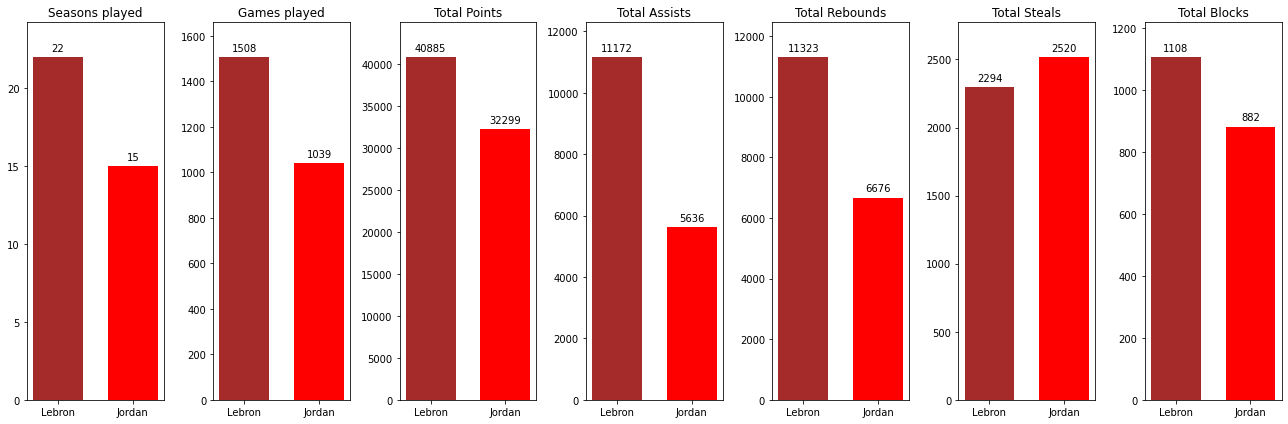

In [105]:
# Both players Total stats in a side-by-side bar chart
# Create a list of stats to plot
stats = list(lebron_stats_dict.keys())

# Set a bar width for the grouped bars
bar_width = 0.2
spacing = 0.05

# Set positions for each bar group
index = np.arange(len(stats))

fig, axes = plt.subplots(1, len(stats), figsize=(18, 6)) 

# Loop through each stat and create a grouped bar chart
for i, stat in enumerate(stats):
    # Values for the bar chart
    lebron_value = lebron_stats_dict[stat]
    jordan_value = jordan_stats_dict[stat]
    
    # Grouped bar chart on each subplot
    lebron_bar = axes[i].bar(index[i] - bar_width / 2 - spacing, lebron_value, bar_width, color='Brown', label='Lebron')
    jordan_bar = axes[i].bar(index[i] + bar_width / 2 + spacing, jordan_value, bar_width, color='red', label='Jordan')
    
    # Title and labels for each subplot
    axes[i].set_title(stat)
    axes[i].bar_label(lebron_bar, label_type='edge', padding=4)
    axes[i].bar_label(jordan_bar, label_type='edge', padding=4)

    # Adjust y-axis limits with some extra space
    max_value = max(lebron_value, jordan_value)
    axes[i].set_ylim(0, max_value + max_value * 0.1)  # Add 10% space above the max value

    # # Add labels at the top of each bar
    # axes[i].text(lebron_value, lebron_value + 0.1, f'{lebron_value:.1f}', va='bottom', ha='center', color='blue')
    # axes[i].text(jordan_value, jordan_value + 0.1, f'{jordan_value:.1f}', va='bottom', ha='center', color='red')

    # Add x-axis labels for "LeBron" and "Jordan" below each bar
    axes[i].set_xticks([index[i] - bar_width / 2 - spacing, index[i] + bar_width / 2 + spacing])
    axes[i].set_xticklabels(['Lebron', 'Jordan'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

